<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans&family=Quicksand&display=swap" rel="stylesheet">

<div display="flex" align="center" justify-content="center" width="100%">

<!-- <img height=80 src="https://drive.google.com/uc?id=13kMLUyF9yPOsfMB782I1wk-_pYNiyxkI"> </img> -->
</div>

<div style="font-family: 'Nunito Sans', sans-serif;">
    
# **Linear Regression**
---
    
</div> 

<div  style="font-size: 22px; color:black; font-family: 'Quicksand', sans-serif;font-weight:500">

Author : Thivin Anandh D 


</div>


<div  style="font-size: 18px; color:black; font-family: 'Quicksand', sans-serif;font-weight:400">
<a href="https://www.linkedin.com/in/thivinanandh/" > Linkedin 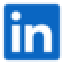</a>
<a href="https://github.com/thivinanandh" > Github 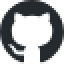</a>

For opening this notebook in google colab, please click on the button below.<br />
<br />
<a href="https://colab.research.google.com/github/thivinanandh/Teaching-Python/blob/main/ML-Algorithms/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</div>


# Introduction to Regression
---


## What is Regression?

Regression is a fundamental technique in machine learning and statistics used to model the relationship between one or more independent variables (features) and a dependent variable (target). The primary goal of regression is to predict continuous numerical values based on input features.

In essence, regression helps us answer questions like:
- How much will a house cost based on its size and location?
- What will be the sales of a product given its advertising budget?
- How does a person's age affect their income?

## Types of Regression

While we'll focus primarily on linear regression in this notebook, it's worth mentioning that there are several types of regression:

1. **Linear Regression**: Models a linear relationship between features and target.
2. **Polynomial Regression**: Extends linear regression to capture non-linear relationships.
3. **Logistic Regression**: Despite its name, it's used for binary classification problems.
4. **Ridge Regression**: Linear regression with L2 regularization.
5. **Lasso Regression**: Linear regression with L1 regularization.
6. **Elastic Net Regression**: Combines both L1 and L2 regularization.

## Real-world Applications

Regression analysis finds applications in various fields:

- **Finance**: Predicting stock prices, risk assessment, portfolio management.
- **Economics**: Forecasting economic trends, analyzing supply and demand.
- **Healthcare**: Predicting patient outcomes, drug efficacy studies.
- **Marketing**: Sales forecasting, customer lifetime value prediction.
- **Environmental Science**: Climate modeling, pollution level prediction.
- **Sports Analytics**: Player performance prediction, game outcome forecasting.

## Linear Regression: The Foundation

In this notebook, we'll dive deep into linear regression, which serves as the foundation for many advanced regression techniques. Linear regression assumes a linear relationship between the input features and the target variable.

The basic form of a linear regression model is:

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

Where:
- y is the target variable
- x₁, x₂, ..., xₙ are the input features
- β₀ is the intercept (bias term)
- β₁, β₂, ..., βₙ are the coefficients (weights)
- ε is the error term


Our goal will be to find the best values for β₀, β₁, β₂, ..., βₙ that minimize the difference between our predictions and the actual values.

In the following sections, we'll explore how to implement linear regression from scratch, use popular libraries like scikit-learn, and evaluate our models effectively.

# Visual Explanation of Linear Regression
---

Linear regression is best understood through visualization. In this section, we'll create three key visualizations to help explain the concept:
1. Scatter plot of data points
2. Best fit line
3. Residuals visualization

Let's start by importing the necessary libraries and creating some sample data.

### Scatter Plot of Data Points
A scatter plot helps us visualize the relationship between the independent variable (X) and the dependent variable (y).



### Best Fit Line
The best fit line is a straight line that represents the relationship between X and y. It minimizes the sum of squared differences between the predicted and actual values.


### Residuals Visualization
Residuals are the differences between the actual values and the predicted values. Visualizing residuals helps us understand how well our model fits the data.


These visualizations provide a clear understanding of how linear regression works and how well it fits the data.
In this residual plot:

Each point represents a residual (the difference between an observed value and its predicted value).
The red dashed line at y=0 represents perfect prediction.
Points above the line indicate underestimation, while points below indicate overestimation.
Ideally, residuals should be randomly scattered around the zero line without any clear pattern.

In [53]:
! python3 -m pip install numpy matplotlib scikit-learn pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.6 MB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 10.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


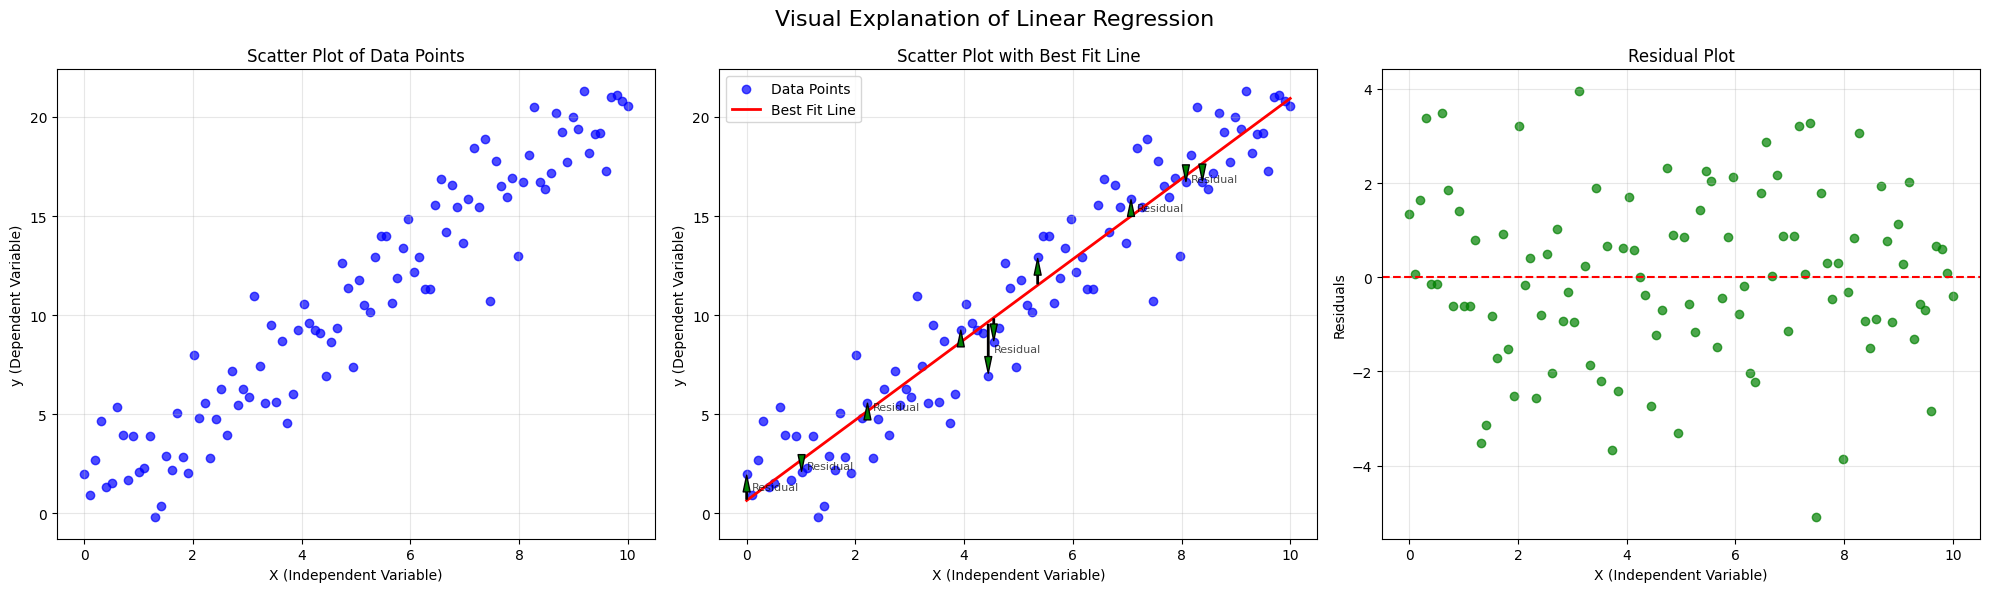

Equation of the best fit line: y = 2.03X + 0.65


In [12]:
# add google colab form to collapse this cell
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for the best fit line
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Visual Explanation of Linear Regression', fontsize=16)

# Subplot 1: Scatter plot of data points
ax1.scatter(X, y, color='blue', alpha=0.7)
ax1.set_title('Scatter Plot of Data Points')
ax1.set_xlabel('X (Independent Variable)')
ax1.set_ylabel('y (Dependent Variable)')
ax1.grid(True, alpha=0.3)

# Subplot 2: Best fit line with residual illustration
ax2.scatter(X, y, color='blue', alpha=0.7, label='Data Points')
ax2.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
ax2.set_title('Scatter Plot with Best Fit Line')
ax2.set_xlabel('X (Independent Variable)')
ax2.set_ylabel('y (Dependent Variable)')
ax2.grid(True, alpha=0.3)

# Add arrows to illustrate residuals for 10 random points
np.random.seed(42)  # for reproducibility
random_indices = np.random.choice(len(X), 10, replace=False)
for idx in random_indices:
    arrow_start = (X[idx], y_pred[idx])
    arrow_end = (X[idx], y[idx])
    ax2.annotate('', xy=arrow_end, xytext=arrow_start,
                 arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=5))
    
    # Add text label for every other point to avoid clutter
    if idx % 2 == 0:
        ax2.text(X[idx]+0.1, np.mean([y_pred[idx], y[idx]]), 'Residual', 
                 verticalalignment='center', fontsize=8, alpha=0.7)

ax2.legend()

# Subplot 3: Residuals visualization
ax3.scatter(X, residuals, color='green', alpha=0.7)
ax3.axhline(y=0, color='red', linestyle='--')
ax3.set_title('Residual Plot')
ax3.set_xlabel('X (Independent Variable)')
ax3.set_ylabel('Residuals')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {model.coef_[0][0]:.2f}X + {model.intercept_[0]:.2f}")

# Simple Linear Regression from Scratch
---

### Dataset Creation

Before we dive into the implementation, let's consider a practical example: predicting house prices based on their size. Our dataset might look like this:

- Feature (X): House size in square feet
- Target (y): House price in dollars

Each data point represents a house, with its size and corresponding price.


### 1. Cost Function Explanation

The cost function, also known as the loss function, measures how well our model is performing. For linear regression, we typically use the Mean Squared Error (MSE) as our cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2$$

Where:
- $J(\theta)$ is the cost
- $m$ is the number of training examples
- $h_\theta(x_i)$ is the predicted value for the i-th example
- $y_i$ is the actual value for the i-th example

The goal is to minimize this cost function.

### 2. Deriving the Partial Derivatives for Gradient Descent

To implement gradient descent, we need to calculate the partial derivatives of the cost function with respect to our parameters ($\theta_0$ and $\theta_1$). Let's derive these step by step.

### Setup

Recall our hypothesis function and cost function:

1. Hypothesis: $h_\theta(x) = \theta_0 + \theta_1x$
2. Cost Function: $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2$

We need to calculate $\frac{\partial}{\partial \theta_0}J(\theta)$ and $\frac{\partial}{\partial \theta_1}J(\theta)$.

### Derivative with respect to $\theta_0$

Let's start with $\frac{\partial}{\partial \theta_0}J(\theta)$:

$$\begin{align*}
\frac{\partial}{\partial \theta_0}J(\theta) &= \frac{\partial}{\partial \theta_0} \left[ \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2 \right] \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m \frac{\partial}{\partial \theta_0} (h_\theta(x_i) - y_i)^2 \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \frac{\partial}{\partial \theta_0} (h_\theta(x_i) - y_i) \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \frac{\partial}{\partial \theta_0} (\theta_0 + \theta_1x_i - y_i) \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \cdot 1 \\[10pt]
&= \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)
\end{align*}$$

### Derivative with respect to $\theta_1$

Now, let's calculate $\frac{\partial}{\partial \theta_1}J(\theta)$:

$$\begin{align*}
\frac{\partial}{\partial \theta_1}J(\theta) &= \frac{\partial}{\partial \theta_1} \left[ \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2 \right] \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m \frac{\partial}{\partial \theta_1} (h_\theta(x_i) - y_i)^2 \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \frac{\partial}{\partial \theta_1} (h_\theta(x_i) - y_i) \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \frac{\partial}{\partial \theta_1} (\theta_0 + \theta_1x_i - y_i) \\[10pt]
&= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x_i) - y_i) \cdot x_i \\[10pt]
&= \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i
\end{align*}$$

These derived formulas allow us to update our parameters in each iteration of the gradient descent algorithm, moving them in the direction that minimizes the cost function.


### 3. Gradient Descent Algorithm

Gradient Descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (in our case, the linear regression model) that minimizes the cost function.

The algorithm works as follows:
1. Start with some initial values for the parameters (often set to 0 or random small values).
2. Calculate the gradient (partial derivatives) of the cost function with respect to each parameter.
3. Update the parameters by moving in the opposite direction of the gradient.
4. Repeat steps 2-3 until convergence.



### Updating Parameters using Gradient Descent

The parameters are updated using the following rule:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

Where:
- $\theta_j$ is the j-th parameter
- $\alpha$ is the learning rate (a small positive value that controls the step size)
- $\frac{\partial}{\partial \theta_j}J(\theta)$ is the partial derivative of the cost function with respect to $\theta_j$

For simple linear regression, we have two parameters to update: the slope ($\theta_1$) and the intercept ($\theta_0$).

1. For $\theta_0$: 
   $$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)$$

2. For $\theta_1$:
   $$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i$$

Where $\alpha$ is our learning rate.

Where $h_\theta(x_i) = \theta_0 + \theta_1x_i$ is our hypothesis (predicted value) for the i-th example.

### Convergence Criteria

Convergence in gradient descent can be determined in several ways:

1. **Fixed number of iterations**: Stop after a predetermined number of iterations.
2. **Threshold for change in cost**: Stop when the decrease in cost becomes very small, e.g.,
   $$|J(\theta)_{new} - J(\theta)_{old}| < \epsilon$$
3. **Threshold for change in parameters**: Stop when the parameters stop changing significantly, e.g.,
   $$\max(|\theta_{j,new} - \theta_{j,old}|) < \epsilon$$

Typically, we might use a combination of these criteria. For example, we might stop when either the cost function decrease is below a certain threshold or a maximum number of iterations is reached.

#### Learning Process - Summary

The learning process ties all these concepts together:

1. Initialize parameters $\theta_0$ and $\theta_1$ (often to 0 or small random values).
2. For each iteration until convergence:
   a. Calculate predicted values using current parameters: $h_\theta(x_i) = \theta_0 + \theta_1x_i$
   b. Compute the cost using the cost function.
   c. Calculate the gradients.
   d. Update the parameters using the gradient descent update rule.
   e. Check for convergence.
3. Once converged, the final parameters represent our trained model.

This process allows us to "learn" the best-fitting line for our data, effectively solving the linear regression problem from scratch.

### Visualization of the Gradient Descent

For a better understanding of the gradient descent, Refer to the following URL:

https://uclaacm.github.io/gradient-descent-visualiser/#playground



Iteration 500: Residual = 327.287067
Iteration 1000: Residual = 326.995766
Iteration 1500: Residual = 326.768499
Iteration 2000: Residual = 326.591190
Iteration 2500: Residual = 326.452856
Iteration 3000: Residual = 326.344931
Iteration 3500: Residual = 326.260731
Iteration 4000: Residual = 326.195039
Iteration 4500: Residual = 326.143787
Iteration 5000: Residual = 326.103801
Iteration 5500: Residual = 326.072606
Iteration 6000: Residual = 326.048267
Iteration 6500: Residual = 326.029279
Iteration 7000: Residual = 326.014464
Iteration 7500: Residual = 326.002906
Iteration 8000: Residual = 325.993889
Iteration 8500: Residual = 325.986854
Iteration 9000: Residual = 325.981366
Iteration 9500: Residual = 325.977083
Iteration 10000: Residual = 325.973743
Maximum iterations (10000) reached without convergence
Trained parameters:
theta_0 (intercept): 0.63
theta_1 (slope): 2.03
Total iterations: 10000

Predictions:
House size: 1500 sq ft, Predicted price: $3046.89
House size: 2000 sq ft, Predi

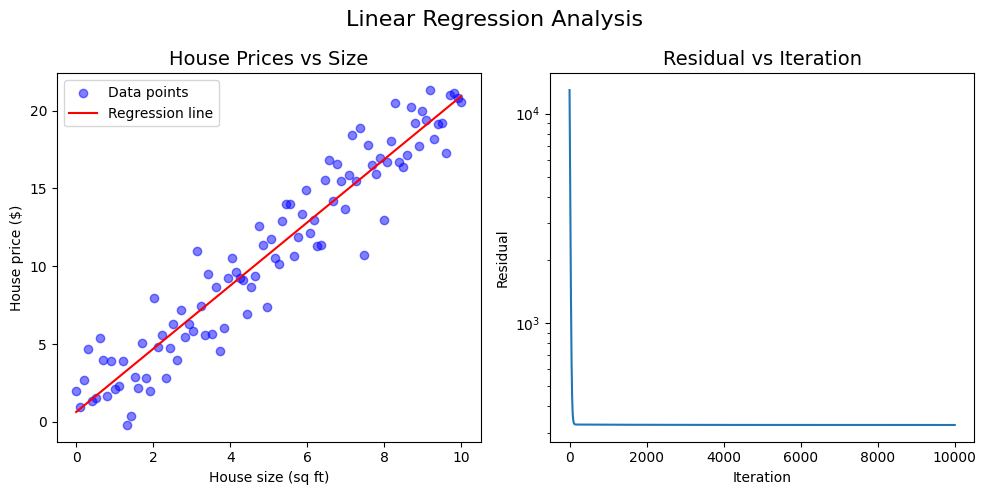

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
def generate_dataset(num_points=100, noise=10):
    """
    Generate a synthetic dataset for linear regression.
    y = 100x + 50000 + random noise
    """
    np.random.seed(42)  # For reproducibility
    
    # Generate sample data
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 2 * X + 1 + np.random.randn(100, 1) * 2
    
    return X, y

# Step 2: Calculate gradients
def calculate_gradients(X, y, theta0, theta1):
    """
    Calculate gradients for theta0 and theta1.
    
    Gradient for theta0: (1/m) * Σ(h(x) - y)
    Gradient for theta1: (1/m) * Σ((h(x) - y) * x)
    where h(x) = theta0 + theta1 * x
    """
    m = len(X)
    predictions = theta0 + theta1 * X
    errors = predictions - y
    
    grad_theta0 = np.sum(errors) / m
    grad_theta1 = np.sum(errors * X) / m
    
    return grad_theta0, grad_theta1

# Step 3: Training step
def train_linear_regression(X, y, learning_rate=0.001, max_iterations=10000, tolerance=1e-6):
    """
    Train the linear regression model using gradient descent until convergence.
    
    Update rule: θj = θj - α * (∂J/∂θj)
    where α is the learning rate and J is the cost function
    
    Convergence is reached when the change in residual is less than the tolerance
    or the maximum number of iterations is reached.
    """
    # Initialize parameters
    theta0 = 0.1
    theta1 = 0.1
    
    # Initialize cost history and iteration counter
    cost_history = []
    residual_history = []
    iterations = 0
    prev_residual = float('inf')
    
    # Convert X and y to numpy arrays if they aren't already
    X = np.array(X)
    y = np.array(y)
    
    while iterations < max_iterations:
        # Calculate gradients
        grad_theta0, grad_theta1 = calculate_gradients(X, y, theta0, theta1)
        
        # Update parameters: θj = θj - α * (∂J/∂θj)
        theta0 -= learning_rate * grad_theta0
        theta1 -= learning_rate * grad_theta1
        
        # Compute the predictions
        predictions = theta0 + theta1 * X
        
        # Compute the cost
        # Cost function: J(θ) = (1/2m) * Σ(h(x) - y)^2
        cost = np.sum((predictions - y) ** 2) / (2 * len(X))
        cost_history.append(cost)
        
        # Compute the residual
        residual = np.sum((y - predictions)**2)
        residual_history.append(residual)
        
        # Check for convergence based on residual
        if abs(prev_residual - residual) < tolerance:
            print(f"Converged after {iterations} iterations")
            break
        
        prev_residual = residual
        iterations += 1
        
        # Print residual every 500 epochs
        if iterations % 500 == 0:
            print(f"Iteration {iterations}: Residual = {residual:.6f}")
    
    if iterations == max_iterations:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return theta0, theta1, cost_history, residual_history, iterations

# Step 4: Prediction function
def predict(X, theta0, theta1):
    """
    Make predictions using the trained model.
    Prediction: h(x) = θ0 + θ1 * x
    """
    return theta0 + theta1 * X


# Generate dataset
X, y = generate_dataset()

# Train the model
theta0, theta1, cost_history, residual_history, iterations = train_linear_regression(X, y)

print("Trained parameters:")
print(f"theta_0 (intercept): {theta0:.2f}")
print(f"theta_1 (slope): {theta1:.2f}")
print(f"Total iterations: {iterations}")

# Make predictions
X_test = np.array([1500, 2000, 2500])  # Test house sizes
predictions = predict(X_test, theta0, theta1)

print("\nPredictions:")
for size, price in zip(X_test, predictions):
    print(f"House size: {size} sq ft, Predicted price: ${price:.2f}")

# Visualize results and residual history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Linear Regression Analysis', fontsize=16)

# Subplot 1: Data points and Regression Line
ax1.scatter(X, y, color='blue', alpha=0.5, label='Data points')
ax1.plot(X, predict(X, theta0, theta1), color='red', label='Regression line')
ax1.set_xlabel('House size (sq ft)')
ax1.set_ylabel('House price ($)')
ax1.set_title('House Prices vs Size', fontsize=14)
ax1.legend()

# Subplot 2: Residual History
ax2.plot(residual_history)
ax2.set_yscale('log')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Residual')
ax2.set_title('Residual vs Iteration', fontsize=14)

plt.tight_layout()
plt.show()

# Scaling Input Data for Machine Learning
---


Scaling input features is a crucial preprocessing step in many machine learning algorithms. It ensures that all features contribute equally to the model and can significantly improve the performance and convergence of algorithms. Two common scaling techniques are normalization and standardization.

## 1. Normalization (Min-Max Scaling)

Normalization scales all numeric variables in the range [0, 1] or [-1, 1]. This technique is also known as Min-Max Scaling.

### Formula:

For scaling to [0, 1]:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

For scaling to [-1, 1]:

$$X_{norm} = 2 * \frac{X - X_{min}}{X_{max} - X_{min}} - 1$$

Where:
- $X$ is the original value
- $X_{min}$ is the minimum value of the feature
- $X_{max}$ is the maximum value of the feature
- $X_{norm}$ is the normalized value

### Pros:
- Bounds values to a specific range
- Preserves zero entries in sparse data

### Cons:
- Doesn't handle outliers well

## 2. Standardization (Z-score Normalization)

Standardization rescales data to have a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1.

### Formula:

$$X_{std} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature
- $X_{std}$ is the standardized value

### Pros:
- Handles outliers better than normalization
- Useful when the distribution of data is Gaussian (normal)

### Cons:
- Doesn't produce normalized data with bounds

## When to Use Each Method:

- Use normalization when:
  - You want your features on a fixed scale (e.g., between 0 and 1)
  - Your distribution is not Gaussian or you're unsure about the distribution

- Use standardization when:
  - You want your features centered around zero with unit variance
  - Your data follows a Gaussian distribution
  - You're using algorithms that assume your data is normally distributed (e.g., Linear Regression, Logistic Regression, Neural Networks)

## Implementation in Python:

Here's a simple implementation of both methods using NumPy:

```python
import numpy as np

def normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

# Example usage:
X = np.array([[1, 2], [3, 4], [5, 6]])
X_norm = normalize(X)
X_std = standardize(X)
```
Remember to apply the same scaling to your test data using the parameters (min, max, mean, std) computed on the training data.
Conclusion:
Scaling your input features is an essential step in data preprocessing. It can significantly improve the performance of many machine learning algorithms, especially those that rely on distances between data points (like k-means clustering) or are sensitive to the scale of input features (like neural networks). Choose the appropriate scaling method based on your data characteristics and the requirements of your chosen algorithm.

Iteration 500: Residual = 326.615607
Converged after 972 iterations
Trained parameters:
theta_0 (intercept): 0.65
theta_1 (slope): 2.03
Total iterations: 972

Predictions:
House size: 1500 sq ft, Predicted price: $3041.86
House size: 2000 sq ft, Predicted price: $4055.60
House size: 2500 sq ft, Predicted price: $5069.33


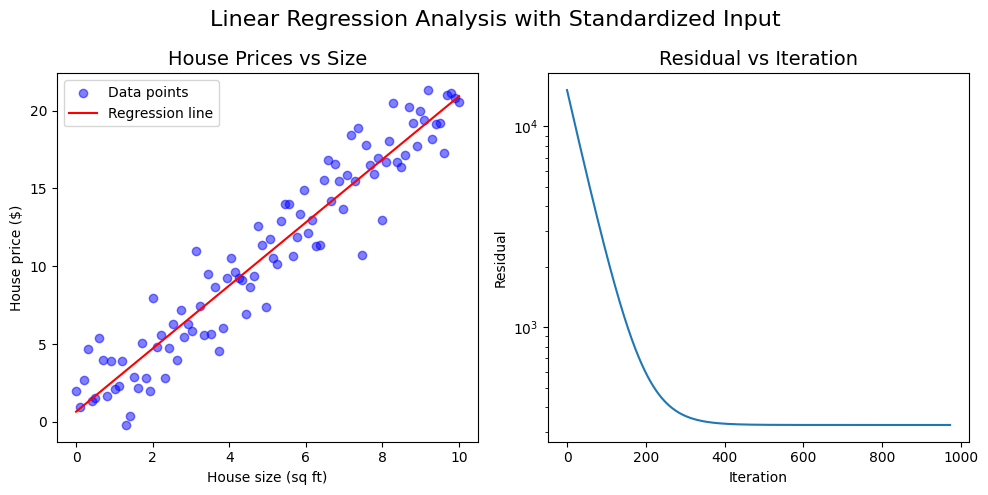

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(num_points=100, noise=10):
    """
    Generate a synthetic dataset for linear regression.
    y = 100x + 50000 + random noise
    """
    np.random.seed(42)  # For reproducibility
    # Generate sample data
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 2 * X + 1 + np.random.randn(100, 1) * 2
    return X, y

def standardize(X):
    """
    Standardize the input features.
    
    Formula: X_std = (X - μ) / σ
    where:
    X_std is the standardized value
    X is the original value
    μ is the mean of the feature
    σ is the standard deviation of the feature
    """
    mean = np.mean(X)
    std = np.std(X)
    return (X - mean) / std, mean, std

def calculate_gradients(X, y, theta0, theta1):
    """
    Calculate gradients for theta0 and theta1.
    
    Gradient for theta0: (1/m) * Σ(h(x) - y)
    Gradient for theta1: (1/m) * Σ((h(x) - y) * x)
    where h(x) = theta0 + theta1 * x
    """
    m = len(X)
    predictions = theta0 + theta1 * X
    errors = predictions - y
    
    grad_theta0 = np.sum(errors) / m
    grad_theta1 = np.sum(errors * X) / m
    
    return grad_theta0, grad_theta1

def train_linear_regression(X, y, learning_rate=0.01, max_iterations=10000, tolerance=1e-6):
    """
    Train the linear regression model using gradient descent until convergence.
    
    Update rule: θj = θj - α * (∂J/∂θj)
    where:
    α is the learning rate
    J is the cost function
    ∂J/∂θj is the partial derivative of the cost function with respect to θj
    
    Convergence is reached when the change in residual is less than the tolerance
    or the maximum number of iterations is reached.
    """
    # Standardize input features
    X_std, X_mean, X_std_dev = standardize(X)
    
    # Initialize parameters
    theta0 = 0
    theta1 = 0
    
    # Initialize histories and iteration counter
    cost_history = []
    residual_history = []
    iterations = 0
    prev_residual = float('inf')
    
    while iterations < max_iterations:
        # Calculate gradients
        grad_theta0, grad_theta1 = calculate_gradients(X_std, y, theta0, theta1)
        
        # Update parameters: θj = θj - α * (∂J/∂θj)
        theta0 -= learning_rate * grad_theta0
        theta1 -= learning_rate * grad_theta1
        
        # Compute the predictions
        predictions = theta0 + theta1 * X_std
        
        # Compute the cost: J(θ) = (1/2m) * Σ(h(x) - y)^2
        cost = np.sum((predictions - y) ** 2) / (2 * len(X))
        cost_history.append(cost)
        
        # Compute the residual: Σ(y - h(x))^2
        residual = np.sum((y - predictions)**2)
        residual_history.append(residual)
        
        # Check for convergence based on residual
        if abs(prev_residual - residual) < tolerance:
            print(f"Converged after {iterations} iterations")
            break
        
        prev_residual = residual
        iterations += 1
        
        # Print residual every 500 epochs
        if iterations % 500 == 0:
            print(f"Iteration {iterations}: Residual = {residual:.6f}")
    
    if iterations == max_iterations:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    # Convert parameters back to original scale
    theta1_orig = theta1 / X_std_dev
    theta0_orig = theta0 - theta1 * X_mean / X_std_dev
    
    return theta0_orig, theta1_orig, cost_history, residual_history, iterations

def predict(X, theta0, theta1):
    """
    Make predictions using the trained model.
    Prediction: h(x) = θ0 + θ1 * x
    """
    return theta0 + theta1 * X

if __name__ == "__main__":
    # Generate dataset
    X, y = generate_dataset()
    
    # Train the model
    theta0, theta1, cost_history, residual_history, iterations = train_linear_regression(X, y)
    
    print("Trained parameters:")
    print(f"theta_0 (intercept): {theta0:.2f}")
    print(f"theta_1 (slope): {theta1:.2f}")
    print(f"Total iterations: {iterations}")
    
    # Make predictions
    X_test = np.array([1500, 2000, 2500])  # Test house sizes
    predictions = predict(X_test, theta0, theta1)
    
    print("\nPredictions:")
    for size, price in zip(X_test, predictions):
        print(f"House size: {size} sq ft, Predicted price: ${price:.2f}")
    
    # Visualize results and residual history
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Linear Regression Analysis with Standardized Input', fontsize=16)

    # Subplot 1: Data points and Regression Line
    ax1.scatter(X, y, color='blue', alpha=0.5, label='Data points')
    ax1.plot(X, predict(X, theta0, theta1), color='red', label='Regression line')
    ax1.set_xlabel('House size (sq ft)')
    ax1.set_ylabel('House price ($)')
    ax1.set_title('House Prices vs Size', fontsize=14)
    ax1.legend()

    # Subplot 2: Residual History
    ax2.plot(residual_history)
    ax2.set_yscale('log')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Residual')
    ax2.set_title('Residual vs Iteration', fontsize=14)

    plt.tight_layout()
    plt.show()

# Multiple Linear Regression
---

## Introduction

Multiple linear regression is an extension of simple linear regression. It's used when we want to predict a dependent variable based on two or more independent variables. This technique allows us to understand the relationship between a dependent variable and multiple independent variables.

## The Model

In multiple linear regression, we model the relationship as:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

Where:
- $y$ is the dependent variable
- $x_1, x_2, ..., x_n$ are the independent variables
- $\beta_0$ is the y-intercept (constant term)
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each independent variable
- $\epsilon$ is the error term

## Matrix Notation

For computational efficiency, we often express multiple linear regression in matrix form:

$$Y = X\beta + \epsilon$$

Where:
- $Y$ is an $m \times 1$ vector of dependent variable values
- $X$ is an $m \times (n+1)$ matrix of independent variables (including a column of 1s for the intercept)
- $\beta$ is an $(n+1) \times 1$ vector of coefficients
- $\epsilon$ is an $m \times 1$ vector of error terms

## Cost Function

The goal is to find the values of $\beta$ that minimize the sum of squared residuals. The cost function (also known as the loss function) is:

$$J(\beta) = \frac{1}{2m} (X\beta - Y)^T(X\beta - Y)$$

Where $m$ is the number of training examples.

## Gradient Descent

To minimize the cost function, we can use gradient descent. The update rule for each coefficient is:

$$\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)$$

Where $\alpha$ is the learning rate.

The partial derivative of the cost function with respect to each $\beta_j$ is:

$$\frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{m} \sum_{i=1}^m (h_\beta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Where $h_\beta(x^{(i)})$ is the prediction for the $i$-th example.

## Normal Equation

An alternative to gradient descent is the normal equation, which provides a direct solution:

$$\beta = (X^TX)^{-1}X^TY$$

This method is computationally efficient for smaller datasets but becomes slow for very large datasets.


**Note:**

In practice, it's recommended to use a library like scikit-learn for efficient implementation of linear regression models.



#  Linear Regression with Scikit-learn
---

### Introduction to scikit-learn

Scikit-learn is a powerful and widely-used machine learning library for Python. It provides a consistent interface for a wide range of machine learning algorithms, including linear regression. Some key features of scikit-learn include:

1. **Consistency**: All estimators (models) in scikit-learn follow a consistent interface, making it easy to switch between different algorithms.

2. **Preprocessing tools**: Scikit-learn offers various tools for data preprocessing, including scaling, normalization, and encoding categorical variables.

3. **Model selection and evaluation**: The library provides functions for cross-validation, hyperparameter tuning, and various metrics for model evaluation.

4. **Efficiency**: Many of the algorithms in scikit-learn are optimized for performance, making them suitable for large datasets.

5. **Documentation**: Scikit-learn has extensive documentation and examples, making it accessible for beginners and experts alike.

### Installation

```bash
pip install scikit-learn
```


### Simple Linear Regression Implementation

Implementing simple linear regression with scikit-learn involves the following steps:

1. **Import necessary modules**: We need to import the LinearRegression model from scikit-learn, along with other useful modules for data manipulation and visualization.

2. **Prepare the data**: Scikit-learn expects the input features (X) to be a 2D array or matrix. For simple linear regression with one feature, we need to reshape our data accordingly.

3. **Create and train the model**: We instantiate the LinearRegression model and use its `fit` method to train on our data.

4. **Make predictions**: We use the trained model's `predict` method to make predictions on new data.

5. **Evaluate the model**: Scikit-learn provides various metrics to evaluate the performance of our model, such as mean squared error and R-squared score.

The scikit-learn implementation abstracts away much of the mathematical complexity, allowing us to focus on the machine learning workflow. It handles the calculation of coefficients (slope and intercept) internally, using efficient algorithms optimized for performance.

Coefficient: 1.9540
Intercept: 1.2151
Mean squared error: 0.8066
R-squared score: 0.9765


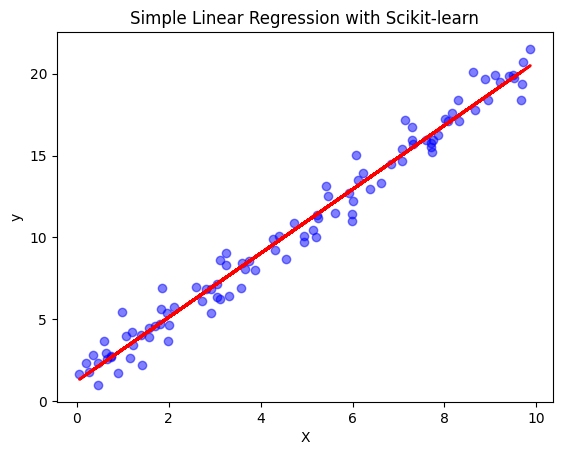

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create a LinearRegression instance
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print model coefficients and intercept
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean squared error: {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

# Visualize the results
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Scikit-learn')
plt.show()

# We will explain the metrics in next section.

## Multiple Linear Regression Implementation
---

Implementing multiple linear regression with scikit-learn involves handling multiple input features. Here's how to do it without using pandas or train-test split:

1. **Reshaping Inputs**: 
   - For multiple linear regression, X should be a 2D array with shape (n_samples, n_features).
   - Each column represents a different feature.

2. **Reshaping Outputs**:
   - The target variable y should be a 1D array with shape (n_samples,).

3. **Training the Model**:
   - Use `model.fit(X, y)` to train the model on all available data.

4. **Making Predictions**:
   - Use `model.predict(X_new)` where X_new has the same number of features as the training data.
   - Ensure X_new is a 2D array, even if predicting for a single sample.

5. **Interpreting Coefficients**:
   - `model.coef_` will be an array with one coefficient per feature.
   - `model.intercept_` is the y-intercept.


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
n_samples = 100
n_features = 3

X = np.random.rand(n_samples, n_features)
y = 2 * X[:, 0] + 0.5 * X[:, 1] - 1 * X[:, 2] + 1 + np.random.randn(n_samples) * 0.1

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same data
y_pred = model.predict(X)

# Print model coefficients and intercept
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"\nMean squared error: {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

# Demonstrate prediction for a single sample
new_sample = np.array([[0.5, 0.6, 0.7]])  # Note the 2D shape
prediction = model.predict(new_sample)
print(f"\nPrediction for new sample {new_sample[0]}: {prediction[0]:.4f}")


Model Coefficients:
Feature 1: 2.0278
Feature 2: 0.4842
Feature 3: -0.9430
Intercept: 0.9735

Mean squared error: 0.0092
R-squared score: 0.9807

Prediction for new sample [0.5 0.6 0.7]: 1.6179

Feature Importance:
Feature 1: 2.0278
Feature 3: 0.9430
Feature 2: 0.4842


# Understanding Metrics in Scikit-learn for Regression
---

Scikit-learn provides various metrics to evaluate the performance of regression models. Here are some of the most common ones:

1. **Mean Squared Error (MSE)**
   - Formula: $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$
   - Importance: Measures the average squared difference between predicted and actual values. Sensitive to outliers.

2. **Root Mean Squared Error (RMSE)**
   - Formula: $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$
   - Importance: Same as MSE but in the same unit as the target variable. Often preferred for interpretability.

3. **Mean Absolute Error (MAE)**
   - Formula: $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$
   - Importance: Measures the average absolute difference between predicted and actual values. Less sensitive to outliers than MSE.

4. **R-squared (Coefficient of Determination)**
   - Formula: $R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$
   - Importance: Represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). Range: [0, 1], with 1 being perfect prediction.

5. **Adjusted R-squared**
   - Formula: $R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}$
   - Importance: Adjusts R-squared for the number of predictors in the model. Useful when comparing models with different numbers of predictors.

6. **Explained Variance Score**
   - Formula: $EVS = 1 - \frac{Var(y - \hat{y})}{Var(y)}$
   - Importance: Similar to R-squared, but can be negative for arbitrarily bad predictions.

7. **Max Error**
   - Formula: $\text{Max Error} = \max(|y_i - \hat{y}_i|)$
   - Importance: Measures the maximum residual error. Useful to understand the worst-case prediction error.

8. **Median Absolute Error**
   - Formula: $\text{MedAE} = \text{median}(|y_1 - \hat{y}_1|, \ldots, |y_n - \hat{y}_n|)$
   - Importance: Calculates the median of all absolute differences between the target and the prediction. Robust to outliers.

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $\bar{y}$ is the mean of actual values
- $n$ is the number of samples
- $p$ is the number of predictors (for Adjusted R-squared)

Each metric provides different insights into model performance, and the choice of metric often depends on the specific requirements of your problem and the characteristics of your data.

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    max_error,
    median_absolute_error
)

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 2 * X[:, 0] + 0.5 * X[:, 1] - 1 * X[:, 2] + 1 + np.random.randn(100) * 0.1

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
evs = explained_variance_score(y, y_pred)
max_err = max_error(y, y_pred)
median_ae = median_absolute_error(y, y_pred)

# Calculate adjusted R-squared
n = len(y)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print all metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"Max Error: {max_err:.4f}")
print(f"Median Absolute Error: {median_ae:.4f}")

Mean Squared Error (MSE): 0.0092
Root Mean Squared Error (RMSE): 0.0959
Mean Absolute Error (MAE): 0.0745
R-squared (R2): 0.9807
Adjusted R-squared: 0.9800
Explained Variance Score: 0.9807
Max Error: 0.3331
Median Absolute Error: 0.0607


# Feature Importance in Linear Regression
---

Feature importance is a technique used to understand the relative impact of each feature (independent variable) on the target variable in a predictive model. In linear regression, feature importance can be derived from the model's coefficients.

## Why is Feature Importance Useful?

1. **Model Interpretation**: It helps in understanding which features are most influential in making predictions.
2. **Feature Selection**: It can guide the process of selecting the most relevant features for your model.
3. **Dimensionality Reduction**: By identifying less important features, you can potentially simplify your model.
4. **Domain Insights**: It can provide valuable insights into the underlying processes that generate the data.

## How to Calculate Feature Importance in Linear Regression

In linear regression, the magnitude of the coefficients can be used as a measure of feature importance. However, there are a few considerations:

1. **Absolute Values**: We typically use the absolute values of coefficients, as both large positive and large negative coefficients indicate importance.
2. **Scaling**: If features are on different scales, it's crucial to standardize them before interpreting coefficient magnitudes as feature importance.
3. **Multicollinearity**: In the presence of highly correlated features, coefficient interpretation can be misleading.

## Visualizing Feature Importance

A common way to visualize feature importance is through a bar plot, where:
- Each bar represents a feature
- The height of the bar represents the importance (absolute value of the coefficient)
- Bars are typically sorted in descending order of importance

This visualization provides a quick and intuitive way to understand which features have the most significant impact on the model's predictions.

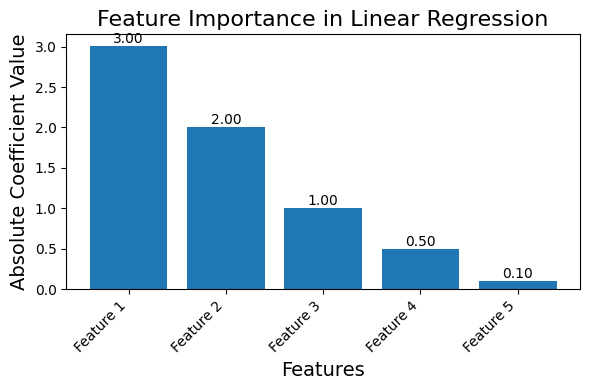

Feature Importances (Absolute Coefficient Values):
Feature 1: 3.0015
Feature 2: 2.0021
Feature 3: 0.9993
Feature 4: 0.4995
Feature 5: 0.0995

Actual Coefficients:
Feature 1: 3.0015
Feature 2: -2.0021
Feature 3: 0.9993
Feature 4: 0.4995
Feature 5: 0.0995

Intercept: 0.0061


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
# We're creating a dataset with 5 features and 1000 samples
n_samples = 1000
n_features = 5

# Generate random features
X = np.random.rand(n_samples, n_features) * 10  # Multiplying by 10 to introduce some scale difference

# Create target variable with known relationships
# y will depend on the features with these coefficients: [3, -2, 1, 0.5, 0.1]
y = 3*X[:, 0] - 2*X[:, 1] + X[:, 2] + 0.5*X[:, 3] + 0.1*X[:, 4] + np.random.randn(n_samples) * 0.1

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate feature importance
# We use the absolute value of coefficients as a measure of importance
feature_importance = np.abs(model.coef_)

# Create a list of feature names (for plotting)
feature_names = [f'Feature {i+1}' for i in range(n_features)]

# Create a list of (feature_name, importance) tuples
importance_pairs = list(zip(feature_names, feature_importance))

# Sort the pairs by importance in descending order
importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Separate the sorted names and importances
sorted_names, sorted_importance = zip(*importance_pairs)

# Plotting
plt.figure(figsize=(6, 4))

# Create the bar plot
bars = plt.bar(range(n_features), sorted_importance)

# Customize the plot
plt.title('Feature Importance in Linear Regression', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Absolute Coefficient Value', fontsize=14)
plt.xticks(range(n_features), sorted_names, rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print feature importances and actual coefficients
print("Feature Importances (Absolute Coefficient Values):")
for name, importance in importance_pairs:
    print(f"{name}: {importance:.4f}")

print("\nActual Coefficients:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")

# Print the intercept
print(f"\nIntercept: {model.intercept_:.4f}")

# Scikit-learn Pipelines

## What are Pipelines?

Pipelines in scikit-learn are a way to chain multiple steps that can be cross-validated together while setting different parameters. They help in preventing data leakage between train and test sets and make the code cleaner and more maintainable.

Key benefits of using pipelines:
1. Simplify your workflow by encapsulating multiple steps
2. Ensure that data transformations are applied consistently to training and test data
3. Facilitate parameter tuning across all steps
4. Make your code more readable and maintainable

## Components of a Pipeline

A typical pipeline might include:
1. Preprocessing steps (e.g., scaling, encoding categorical variables)
2. Feature selection
3. The final estimator (e.g., a regression or classification model)

## Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

Common types of cross-validation:
1. K-Fold Cross-Validation
2. Stratified K-Fold Cross-Validation
3. Leave-One-Out Cross-Validation

Refer to the [Cross-Validation](https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right) for more details.

## Train-Test Split

Train-test split is a technique for evaluating the performance of a machine learning model. It involves dividing the available data into two subsets:
1. Training set: Used to train the model
2. Test set: Used to evaluate the model's performance on unseen data

The typical split is often 70-80% for training and 20-30% for testing.

## Example Code

Below is an example that demonstrates how to use scikit-learn pipelines with cross-validation and train-test split:

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

# Generate a random regression problem
X, y = make_regression(n_samples=1000, n_features=10, noise=0.4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('regressor', LinearRegression())  # Step 2: Linear Regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the score (R^2) on the test set
test_score = pipeline.score(X_test, y_test)
print(f"Test set R^2 score: {test_score:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# Access steps in the pipeline
scaler = pipeline.named_steps['scaler']
regressor = pipeline.named_steps['regressor']

# Print feature importances (coefficients for linear regression)
# how to get feature importance in scikit-learn
feature_importance = abs(regressor.coef_)
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1} importance: {importance:.4f}")

Test set R^2 score: 1.0000
Cross-validation scores: [0.99999313 0.9999882  0.99999274 0.99999188 0.99998869]
Mean CV score: 1.0000
Feature 1 importance: 34.3112
Feature 2 importance: 32.2890
Feature 3 importance: 29.7178
Feature 4 importance: 77.8348
Feature 5 importance: 7.1912
Feature 6 importance: 10.4095
Feature 7 importance: 71.8753
Feature 8 importance: 9.3078
Feature 9 importance: 5.4019
Feature 10 importance: 59.6208


#  Regularization Techniques
---

Regularization is a technique used to prevent overfitting in machine learning models. It adds a penalty term to the loss function, discouraging the model from fitting the noise in the training data too closely. Here are three common regularization techniques used in linear regression:

## 1. Ridge Regression (L2 Regularization)

Ridge regression adds a penalty term proportional to the square of the magnitude of coefficients.

### Mathematical Formulation:

The objective function for Ridge regression is:

$$\min_{\beta} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

Where:
- $\beta_0$ is the intercept
- $\beta_j$ are the coefficients
- $\lambda$ is the regularization parameter
- $p$ is the number of features

The term $\lambda \sum_{j=1}^p \beta_j^2$ is the L2 penalty.

### Key Characteristics:
- Shrinks coefficients towards zero, but doesn't eliminate them
- Effective when many features have small/medium sized effects

## 2. Lasso Regression (L1 Regularization)

Lasso (Least Absolute Shrinkage and Selection Operator) regression adds a penalty term proportional to the absolute value of the magnitude of coefficients.

### Mathematical Formulation:

The objective function for Lasso regression is:

$$\min_{\beta} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|$$

The term $\lambda \sum_{j=1}^p |\beta_j|$ is the L1 penalty.

### Key Characteristics:
- Can shrink coefficients to exactly zero, performing feature selection
- Effective when there are many irrelevant features

## 3. Elastic Net

Elastic Net combines both L1 and L2 regularization.

### Mathematical Formulation:

The objective function for Elastic Net is:

$$\min_{\beta} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \beta_j^2$$

Where:
- $\lambda_1$ is the L1 regularization parameter
- $\lambda_2$ is the L2 regularization parameter

### Key Characteristics:
- Combines the benefits of both Ridge and Lasso
- Can perform feature selection like Lasso while still maintaining the regularization benefits of Ridge

## Choosing the Right Regularization Technique

- Use Ridge when you have many small/medium sized effects
- Use Lasso when you have a small number of significant effects
- Use Elastic Net when you have many effects, some small/medium and some large

The choice of regularization parameter ($\lambda$) is crucial and is often determined through cross-validation.

Detailed Results:
-----------------
Linear Regression:
  Mean Squared Error: 114.0701
  R-squared Score: 0.9982
  Cross-validation Scores: [0.99856603 0.998255   0.99822554 0.99830241 0.99802963]
  Mean CV Score: 0.9983
  Standard Deviation of CV Scores: 0.0002

Ridge Regression:
  Mean Squared Error: 114.2960
  R-squared Score: 0.9982
  Cross-validation Scores: [0.998572   0.99823438 0.99823355 0.99831865 0.99800407]
  Mean CV Score: 0.9983
  Standard Deviation of CV Scores: 0.0002

Lasso Regression:
  Mean Squared Error: 131.8868
  R-squared Score: 0.9979
  Cross-validation Scores: [0.99830894 0.99776708 0.99820167 0.998198   0.99767081]
  Mean CV Score: 0.9980
  Standard Deviation of CV Scores: 0.0003

Elastic Net:
  Mean Squared Error: 7728.8910
  R-squared Score: 0.8762
  Cross-validation Scores: [0.87211509 0.87491062 0.88377307 0.88159491 0.8803561 ]
  Mean CV Score: 0.8785
  Standard Deviation of CV Scores: 0.0043



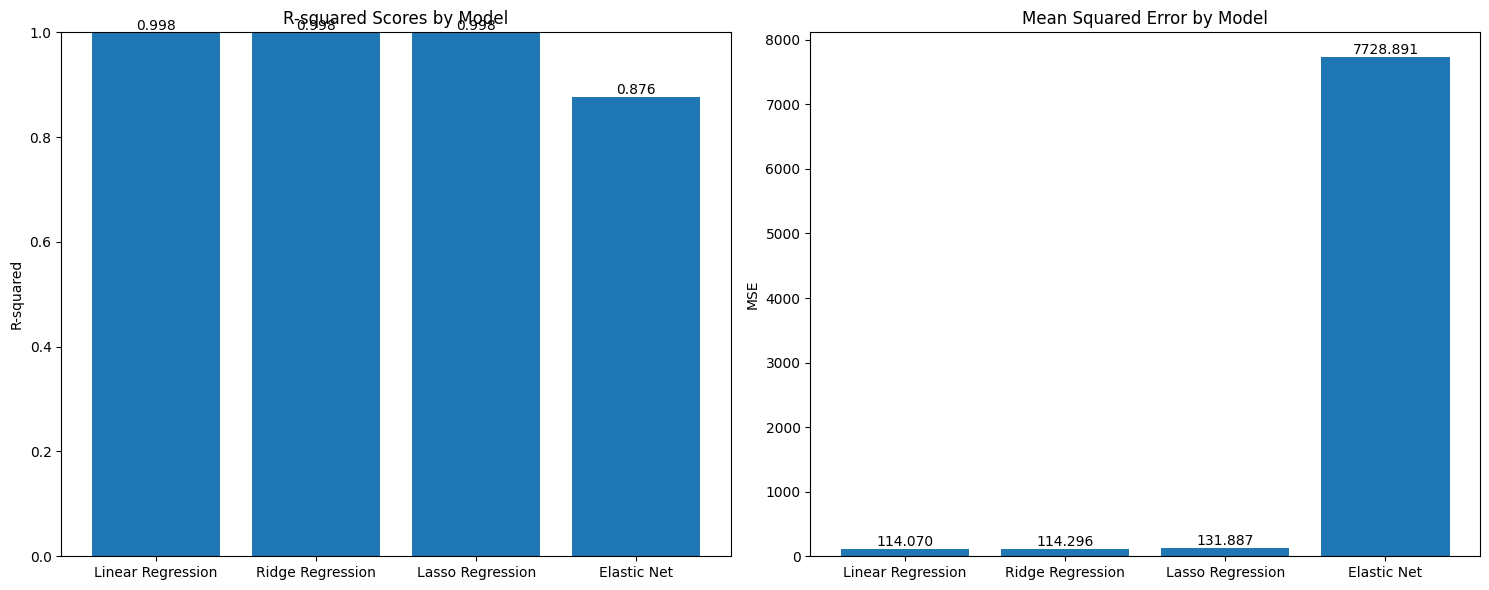

Feature Importance Analysis:
----------------------------
Linear Regression:
  Number of non-zero coefficients: 20
  Average absolute coefficient value: 44.1038

Ridge Regression:
  Number of non-zero coefficients: 20
  Average absolute coefficient value: 44.0464

Lasso Regression:
  Number of non-zero coefficients: 16
  Average absolute coefficient value: 54.0159

Elastic Net:
  Number of non-zero coefficients: 19
  Average absolute coefficient value: 30.7420



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

# Data Generation Function
def generate_data(n_samples=1000, n_features=20, noise=10, n_informative=16):
    """
    Generate synthetic data for regression analysis.
    
    This function creates a dataset with a known underlying structure,
    allowing us to test our regression models under controlled conditions.
    
    Parameters:
    - n_samples: Total number of data points to generate.
    - n_features: Total number of features (columns) in the dataset.
    - noise: Amount of random noise to add to the target variable.
             Higher values make the problem harder.
    - n_informative: Number of features that are actually used to construct the target variable.
                     The rest are random and don't contribute to the target.

    Returns:
    - X: Feature matrix of shape (n_samples, n_features)
    - y: Target vector of shape (n_samples,)
    """
    X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                           noise=noise, n_informative=n_informative, 
                           random_state=42)
    return X, y

# Data Preprocessing Function
def preprocess_data(X, y):
    """
    Preprocess the data by splitting into train and test sets and scaling features.
    
    This function performs two crucial preprocessing steps:
    1. Splitting the data into training and testing sets.
    2. Standardizing the features to have mean=0 and variance=1.
    
    Standardization is important for many machine learning algorithms,
    especially for regularized models like Ridge and Lasso.

    Parameters:
    - X: Feature matrix
    - y: Target vector

    Returns:
    - X_train_scaled, X_test_scaled: Scaled training and test feature matrices
    - y_train, y_test: Training and test target vectors
    """
    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    # This transforms the features to have mean=0 and variance=1
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Model Training and Evaluation Function
def train_and_evaluate(X_train, X_test, y_train, y_test):
    """
    Train and evaluate different regression models.
    
    This function trains four different regression models:
    1. Linear Regression (no regularization)
    2. Ridge Regression (L2 regularization)
    3. Lasso Regression (L1 regularization)
    4. Elastic Net (combination of L1 and L2 regularization)
    
    It then evaluates each model using multiple metrics:
    - Mean Squared Error (MSE) on the test set
    - R-squared score on the test set
    - 5-fold cross-validation scores on the training set

    Parameters:
    - X_train, X_test: Training and test feature matrices
    - y_train, y_test: Training and test target vectors

    Returns:
    - results: Dictionary containing performance metrics for each model
    """
    # Define the models to be trained and evaluated
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5)
    }

    results = {}

    for name, model in models.items():
        # Train the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Perform 5-fold cross-validation on the training set
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

        # Store results in the dictionary
        results[name] = {
            'model': model,
            'mse': mse,
            'r2': r2,
            'cv_scores': cv_scores
        }

    return results

# Results Visualization Function
def visualize_results(results):
    """
    Visualize the performance of different regression models.
    
    This function creates two bar plots:
    1. R-squared scores for each model
    2. Mean Squared Error (MSE) for each model
    
    These visualizations help in comparing the performance of different models at a glance.

    Parameters:
    - results: Dictionary containing model performances
    """
    # Extract model names and performance metrics
    model_names = list(results.keys())
    r2_scores = [results[name]['r2'] for name in model_names]
    mse_scores = [results[name]['mse'] for name in model_names]

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot R-squared scores
    ax1.bar(model_names, r2_scores)
    ax1.set_title('R-squared Scores by Model')
    ax1.set_ylabel('R-squared')
    ax1.set_ylim(0, 1)  # R-squared is typically between 0 and 1
    for i, v in enumerate(r2_scores):
        ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom')

    # Plot MSE scores
    ax2.bar(model_names, mse_scores)
    ax2.set_title('Mean Squared Error by Model')
    ax2.set_ylabel('MSE')
    for i, v in enumerate(mse_scores):
        ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_data()

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(X, y)

    # Train models and get results
    results = train_and_evaluate(X_train, X_test, y_train, y_test)

    # Print detailed results for each model
    print("Detailed Results:")
    print("-----------------")
    for name, result in results.items():
        print(f"{name}:")
        print(f"  Mean Squared Error: {result['mse']:.4f}")
        print(f"  R-squared Score: {result['r2']:.4f}")
        print(f"  Cross-validation Scores: {result['cv_scores']}")
        print(f"  Mean CV Score: {np.mean(result['cv_scores']):.4f}")
        print(f"  Standard Deviation of CV Scores: {np.std(result['cv_scores']):.4f}")
        print()

    # Visualize the results
    visualize_results(results)

    # Analyze feature importance based on model coefficients
    print("Feature Importance Analysis:")
    print("----------------------------")
    for name, result in results.items():
        model = result['model']
        if hasattr(model, 'coef_'):
            non_zero_coef = model.coef_[model.coef_ != 0]
            print(f"{name}:")
            print(f"  Number of non-zero coefficients: {len(non_zero_coef)}")
            print(f"  Average absolute coefficient value: {np.mean(np.abs(non_zero_coef)):.4f}")
            print()

# N. Common Pitfalls and Best Practices in Linear Regression

Linear regression is a powerful and widely used statistical technique, but it comes with its own set of challenges and assumptions. Understanding these can help you apply the method more effectively and interpret results more accurately.

## 1. Outlier Detection and Handling

Outliers are data points that differ significantly from other observations. They can have a disproportionate effect on the regression line and skew results.

### Detection Methods:
1. **Visual Methods**: 
   - Scatter plots
   - Box plots
   - Residual plots

2. **Statistical Methods**:
   - Z-score: Points with a z-score > 3 or < -3 are often considered outliers
   - Interquartile Range (IQR): Points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR

### Z-score

The z-score is a measure of how many standard deviations an observation is from the mean. It is calculated as:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $x$ is the observation
- $\mu$ is the mean
- $\sigma$ is the standard deviation

### IQR

The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. It is a measure of the spread of the data.

$$IQR = Q3 - Q1$$

Here Q1 is the 25th percentile and Q3 is the 75th percentile. For Eg, if we have a dataset of [11, 15, 16, 17, 19, 20, 21, 22, 23, 25], then Q1 is calculated as:

$$Q1 = 15 + 16 / 2 = 15.5$$

And Q3 is calculated as:

$$Q3 = 21 + 22 / 2 = 21.5$$

So, the IQR is:   

$$IQR = 21.5 - 15.5 = 6$$





### Handling Outliers:
1. **Investigate**: Understand why the outlier exists. Is it a data entry error or a genuine anomaly?
2. **Remove**: If the outlier is due to an error, consider removing it.

Best Practice: Always investigate outliers before deciding how to handle them. Blindly removing outliers can lead to loss of important information.


Generating sample data...
Generated data shape: (1000, 5)

Identifying outliers using Z-score method...
Number of outliers detected: 47


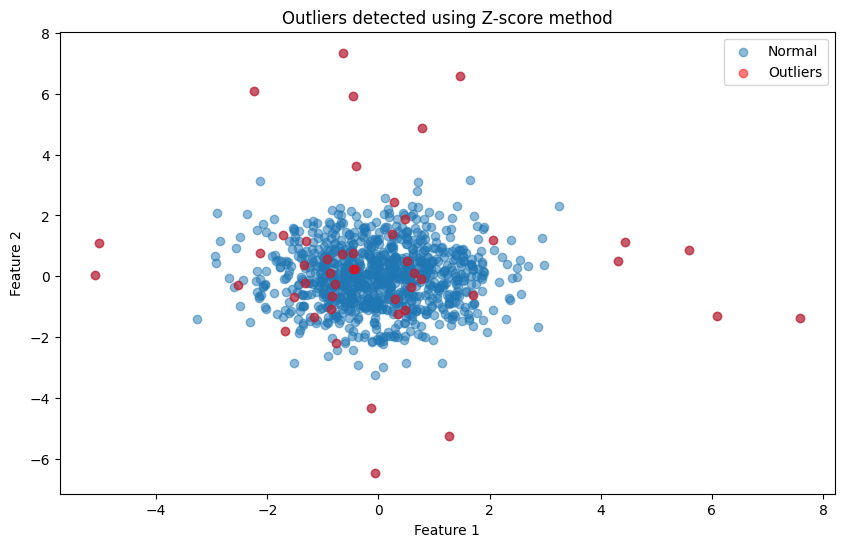


Identifying outliers using IQR method...
Number of outliers detected: 87


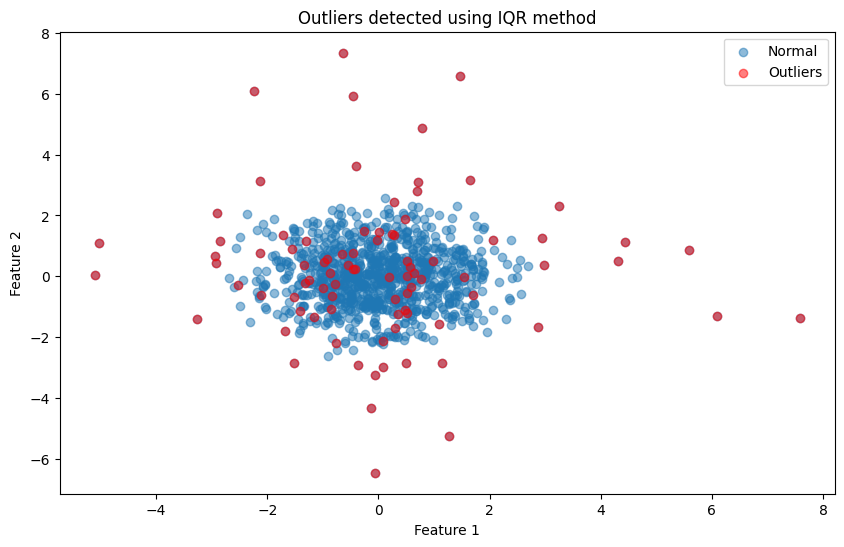


Removing outliers...
Shape of data after removing outliers: (913, 5)

Outlier detection and removal process completed.


Data shape: (1000, 2)

First few rows of the data:
   feature_1  feature_2
0   0.496714  -0.138264
1   0.647689   1.523030
2  -0.234153  -0.234137
3   1.579213   0.767435
4  -0.469474   0.542560

Q1 values:
feature_1   -0.612525
feature_2   -0.654548
Name: 0.25, dtype: float64

Q3 values:
feature_1    0.646035
feature_2    0.720657
Name: 0.75, dtype: float64

IQR values:
feature_1    1.258560
feature_2    1.375205
dtype: float64

Lower bounds:
feature_1   -2.500366
feature_2   -2.717356
dtype: float64

Upper bounds:
feature_1    2.533876
feature_2    2.783464
dtype: float64

Outlier mask (first few rows):
   feature_1  feature_2
0      False      False
1      False      False
2      False      False
3      False      False
4      False      False

Number of outliers in each feature:
feature_1    21
feature_2    18
dtype: int64


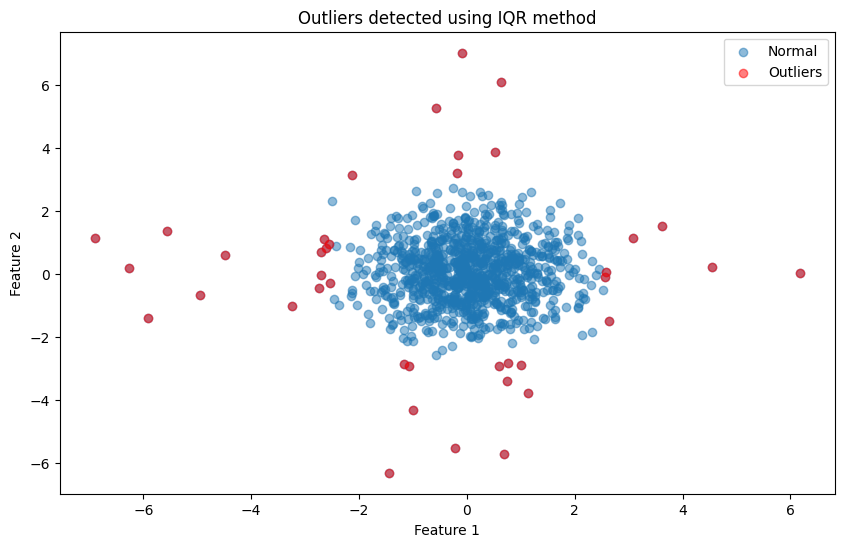


Shape of data after removing outliers: (961, 2)

Number of rows removed: 39
Percentage of rows removed: 3.90%


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)  # Set seed for reproducibility
n_samples = 1000
n_features = 2

# Create a DataFrame with two features
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=['feature_1', 'feature_2'])

# Add some outliers
# We'll add outliers to about 1% of the data points
for col in df.columns:
    # Randomly select 1% of the indices
    outlier_indices = np.random.choice(n_samples, size=n_samples//100, replace=False)
    
    # For these indices, add a large value (positive or negative)
    # This will create obvious outliers
    df.loc[outlier_indices, col] += np.random.choice([-1, 1], size=len(outlier_indices)) * np.random.uniform(4, 6, size=len(outlier_indices))

print("Data shape:", df.shape)
print("\nFirst few rows of the data:")
print(df.head())

# Calculate Q1 (25th percentile) for each feature
# Q1 is the value below which 25% of the observations fall
Q1 = df.quantile(0.25)
print("\nQ1 values:")
print(Q1)

# Calculate Q3 (75th percentile) for each feature
# Q3 is the value below which 75% of the observations fall
Q3 = df.quantile(0.75)
print("\nQ3 values:")
print(Q3)

# Calculate IQR (Interquartile Range) for each feature
# IQR is the range between the first quartile (Q1) and the third quartile (Q3)
IQR = Q3 - Q1
print("\nIQR values:")
print(IQR)

# Calculate lower and upper bounds for outliers
# We consider a data point an outlier if it falls below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
# The factor 1.5 is commonly used, but can be adjusted based on how strict you want to be
factor = 1.5
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

print("\nLower bounds:")
print(lower_bound)
print("\nUpper bounds:")
print(upper_bound)

# Create a boolean mask for outliers
# This mask will have the same shape as our dataframe
# It will contain True for each value that is considered an outlier
outliers_mask = ((df < lower_bound) | (df > upper_bound))

print("\nOutlier mask (first few rows):")
print(outliers_mask.head())

# Count the number of outliers in each feature
outlier_counts = outliers_mask.sum()
print("\nNumber of outliers in each feature:")
print(outlier_counts)

# Visualize the data and outliers
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df['feature_1'], df['feature_2'], alpha=0.5, label='Normal')

# Highlight outliers
# We consider a point an outlier if it's an outlier in either feature
outliers = df[outliers_mask.any(axis=1)]
plt.scatter(outliers['feature_1'], outliers['feature_2'], color='red', alpha=0.5, label='Outliers')

plt.title('Outliers detected using IQR method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Remove outliers
# We keep only the rows where no feature is an outlier
df_clean = df[~outliers_mask.any(axis=1)]

print("\nShape of data after removing outliers:", df_clean.shape)

# Calculate how many rows were removed
rows_removed = df.shape[0] - df_clean.shape[0]
print(f"\nNumber of rows removed: {rows_removed}")
print(f"Percentage of rows removed: {rows_removed/df.shape[0]*100:.2f}%")

# Regression Model Comparison Project

In this project, you will work with a custom-generated dataset to compare the performance of Linear Regression and Lasso Regression models. You'll go through the process of data cleaning, model creation, and evaluation using cross-validation.

## Dataset Description

The dataset is synthetically generated and consists of:
- 5 input features (X1, X2, X3, X4, X5): All numerical
- 1 output variable (Y): Numerical, dependent on the input features

## Project Tasks

1. Data Generation and Exploration
   - Generate a synthetic dataset with 1000 samples
   - Explore the dataset (summary statistics, data distribution)

2. Data Cleaning
   - Identify and remove outliers using the Z-score method
   - Use a threshold of 3 for the Z-score (i.e., remove data points with Z-score > 3 or < -3)

3. Model Creation with Pipelines
   - Create two pipelines:
     a. Linear Regression pipeline
     b. Lasso Regression pipeline
   - Each pipeline should include:
     - Standard scaling of features
     - The respective regression model

4. Model Evaluation
   - Perform 5-fold cross-validation for both models
   - Calculate the R2 score for each fold
   - Compute the mean and standard deviation of R2 scores for each model

5. Model Comparison
   - Compare the mean R2 scores of Linear Regression and Lasso Regression
   - Determine which model performs better on this dataset

6. Results Visualization
   - Create a box plot to visualize the distribution of R2 scores for both models


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline

def generate_data(n_samples=1000, n_features=5):
    """
    Generate a synthetic dataset for regression analysis.

    This function creates a dataset with a linear relationship between
    the features and the target variable, with some added noise.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=5)
        The number of features to generate.

    Returns:
    --------
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    """
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    
    # True coefficients
    true_coef = np.random.randn(n_features)
    
    # Generate y with some noise
    y = X.dot(true_coef) + np.random.randn(n_samples) * 0.1
    
    return X, y

def remove_outliers(X, y, threshold=3):
    """
    Remove outliers from the dataset using the Z-score method.

    Parameters:
    -----------
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    threshold : float, optional (default=3)
        The Z-score threshold for identifying outliers.

    Returns:
    --------
    X_clean : ndarray
        The input features with outliers removed.
    y_clean : ndarray
        The target variable with outliers removed.
    """
    # TODO: Implement outlier removal using Z-score method
    # Hint: Calculate Z-scores for each feature and the target variable
    # Remove data points where any feature or the target has |Z-score| > threshold
    
    return X_clean, y_clean

def create_linear_regression_pipeline():
    """
    Create a pipeline for Linear Regression with standardization.

    Returns:
    --------
    Pipeline
        A scikit-learn pipeline with StandardScaler and LinearRegression.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

def create_lasso_pipeline():
    """
    Create a pipeline for Lasso Regression with standardization.

    Returns:
    --------
    Pipeline
        A scikit-learn pipeline with StandardScaler and Lasso.
    """
    # TODO: Create a pipeline with StandardScaler and Lasso
    # Hint: Use the Pipeline class from scikit-learn
    
    pass

def evaluate_model(model, X, y, cv=5):
    """
    Evaluate the model using cross-validation.

    Parameters:
    -----------
    model : estimator object
        The machine learning model to evaluate.
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    cv : int, optional (default=5)
        The number of folds in cross-validation.

    Returns:
    --------
    scores : ndarray
        The R2 scores for each fold of cross-validation.
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return scores

def plot_results(linear_scores, lasso_scores):
    """
    Create a box plot to compare the R2 scores of Linear Regression and Lasso.

    Parameters:
    -----------
    linear_scores : ndarray
        The R2 scores from cross-validation for Linear Regression.
    lasso_scores : ndarray
        The R2 scores from cross-validation for Lasso Regression.
    """
    # TODO: Create a box plot comparing the two models' R2 scores
    # Hint: Use plt.boxplot() and add appropriate labels and title
    
    pass

if __name__ == "__main__":
    # Generate data
    X, y = generate_data()
    print(f"Generated data shape: X - {X.shape}, y - {y.shape}")

    # Remove outliers
    X_clean, y_clean = remove_outliers(X, y)
    print(f"Data shape after removing outliers: X - {X_clean.shape}, y - {y_clean.shape}")

    # Create pipelines
    linear_pipeline = create_linear_regression_pipeline()
    lasso_pipeline = create_lasso_pipeline()

    # Evaluate models
    linear_scores = evaluate_model(linear_pipeline, X_clean, y_clean)
    lasso_scores = evaluate_model(lasso_pipeline, X_clean, y_clean)

    # Print results
    print("Linear Regression - R2 scores:")
    print(f"Mean: {np.mean(linear_scores):.4f}, Std: {np.std(linear_scores):.4f}")
    print("Lasso Regression - R2 scores:")
    print(f"Mean: {np.mean(lasso_scores):.4f}, Std: {np.std(lasso_scores):.4f}")

    # Plot results
    plot_results(linear_scores, lasso_scores)

    # TODO: Add a conclusion about which model performs better and why

Generated data shape: X - (1000, 5), y - (1000,)


NameError: name 'X_clean' is not defined

Generated data shape: X - (1000, 5), y - (1000,)
Data shape after removing outliers: X - (984, 5), y - (984,)
Linear Regression - R2 scores:
Mean: 0.9975, Std: 0.0003
Lasso Regression - R2 scores:
Mean: 0.5150, Std: 0.0211


/var/folders/77/8wmzwk0d75xbb0w7f_cxngmw0000gn/T/ipykernel_27157/1304036417.py:167: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([linear_scores, lasso_scores], labels=['Linear Regression', 'Lasso Regression'])


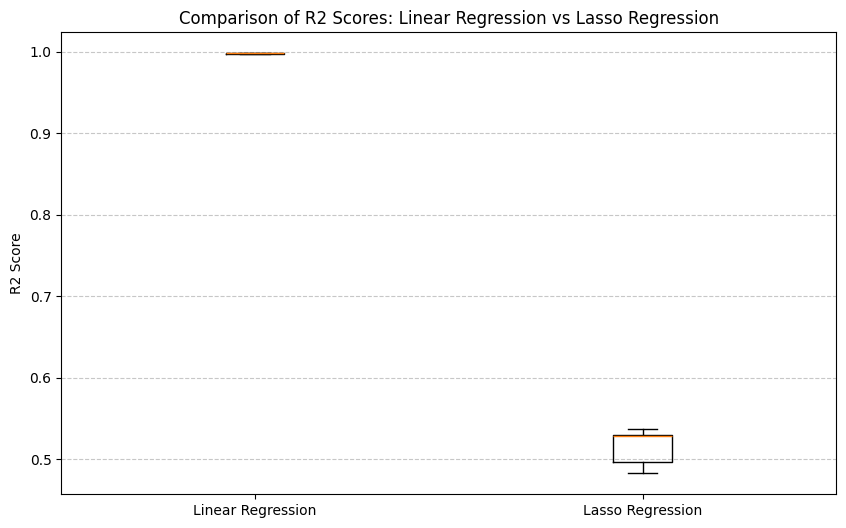


Conclusion:
Linear Regression performs better on this dataset.
This suggests that the relationship between features and target is mostly linear,
and there isn't much benefit from the regularization provided by Lasso.


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline

def generate_data(n_samples=1000, n_features=5):
    """
    Generate a synthetic dataset for regression analysis.

    This function creates a dataset with a linear relationship between
    the features and the target variable, with some added noise.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=5)
        The number of features to generate.

    Returns:
    --------
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    """
    # Set a random seed for reproducibility
    np.random.seed(42)

    # Generate random input features
    X = np.random.randn(n_samples, n_features)
    
    # Generate true coefficients
    true_coef = np.random.randn(n_features)
    
    # Calculate y as a linear combination of X and true_coef
    y = np.dot(X, true_coef)

    # Add some random noise to y
    noise = np.random.randn(n_samples) * 0.1
    y += noise
    
    return X, y

def remove_outliers(X, y, threshold=3):
    """
    Remove outliers from the dataset using the Z-score method.

    Parameters:
    -----------
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    threshold : float, optional (default=3)
        The Z-score threshold for identifying outliers.

    Returns:
    --------
    X_clean : ndarray
        The input features with outliers removed.
    y_clean : ndarray
        The target variable with outliers removed.
    """
    # Combine X and y for joint outlier removal
    data = np.column_stack((X, y))

    # Calculate the Z-scores for each feature and the target
    z_scores = np.abs((data - np.mean(data, axis=0)) / np.std(data, axis=0))

    # Create a mask for non-outlier data points
    # A point is considered an outlier if any of its features or its target
    # has a Z-score greater than the threshold
    mask = np.all(z_scores < threshold, axis=1)

    # Apply the mask to get clean data
    clean_data = data[mask]

    # Separate the clean data back into X and y
    X_clean = clean_data[:, :-1]
    y_clean = clean_data[:, -1]

    return X_clean, y_clean

def create_linear_regression_pipeline():
    """
    Create a pipeline for Linear Regression with standardization.

    Returns:
    --------
    Pipeline
        A scikit-learn pipeline with StandardScaler and LinearRegression.
    """
    # Create a pipeline that first standardizes the features
    # and then applies Linear Regression
    return Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

def create_lasso_pipeline():
    """
    Create a pipeline for Lasso Regression with standardization.

    Returns:
    --------
    Pipeline
        A scikit-learn pipeline with StandardScaler and Lasso.
    """
    # Create a pipeline that first standardizes the features
    # and then applies Lasso Regression
    # We set alpha to 1.0, but this could be tuned for better performance
    return Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso(alpha=1.0))
    ])

def evaluate_model(model, X, y, cv=5):
    """
    Evaluate the model using cross-validation.

    Parameters:
    -----------
    model : estimator object
        The machine learning model to evaluate.
    X : ndarray of shape (n_samples, n_features)
        The input features.
    y : ndarray of shape (n_samples,)
        The target variable.
    cv : int, optional (default=5)
        The number of folds in cross-validation.

    Returns:
    --------
    scores : ndarray
        The R2 scores for each fold of cross-validation.
    """
    # Perform cross-validation and return the R2 scores
    scores = cross_val_score(
        model,  # The model to evaluate
        X,      # Input features
        y,      # Target variable
        cv=cv,  # Number of folds
        scoring='r2'  # Use R2 score as the evaluation metric
    )
    return scores

def plot_results(linear_scores, lasso_scores):
    """
    Create a box plot to compare the R2 scores of Linear Regression and Lasso.

    Parameters:
    -----------
    linear_scores : ndarray
        The R2 scores from cross-validation for Linear Regression.
    lasso_scores : ndarray
        The R2 scores from cross-validation for Lasso Regression.
    """
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Create the box plot
    # The box shows the quartiles of the dataset
    # The whiskers extend to show the rest of the distribution
    bp = plt.boxplot([linear_scores, lasso_scores], labels=['Linear Regression', 'Lasso Regression'])

    # Customize the plot
    plt.title('Comparison of R2 Scores: Linear Regression vs Lasso Regression')
    plt.ylabel('R2 Score')

    # Add a horizontal grid to the plot, for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Generate data
    X, y = generate_data()
    print(f"Generated data shape: X - {X.shape}, y - {y.shape}")

    # Remove outliers
    X_clean, y_clean = remove_outliers(X, y)
    print(f"Data shape after removing outliers: X - {X_clean.shape}, y - {y_clean.shape}")

    # Create pipelines
    linear_pipeline = create_linear_regression_pipeline()
    lasso_pipeline = create_lasso_pipeline()

    # Evaluate models
    linear_scores = evaluate_model(linear_pipeline, X_clean, y_clean)
    lasso_scores = evaluate_model(lasso_pipeline, X_clean, y_clean)

    # Print results
    print("Linear Regression - R2 scores:")
    print(f"Mean: {np.mean(linear_scores):.4f}, Std: {np.std(linear_scores):.4f}")
    print("Lasso Regression - R2 scores:")
    print(f"Mean: {np.mean(lasso_scores):.4f}, Std: {np.std(lasso_scores):.4f}")

    # Plot results
    plot_results(linear_scores, lasso_scores)

    # Conclusion
    print("\nConclusion:")
    if np.mean(linear_scores) > np.mean(lasso_scores):
        print("Linear Regression performs better on this dataset.")
        print("This suggests that the relationship between features and target is mostly linear,")
        print("and there isn't much benefit from the regularization provided by Lasso.")
    else:
        print("Lasso Regression performs better on this dataset.")
        print("This suggests that some feature selection or regularization is beneficial,")
        print("possibly due to some irrelevant features or to prevent overfitting.")